## Figure S6 Part 1: Coherent Rotations of some sessions

In [1]:
import scipy.stats as sstats
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd
import pingouin as pg

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as er
from plotting import Fig, pretty_plot, FigMirror
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc
import cell_tracking as ct
import er_plot_functions as erp
from helpers import flatten

[8.5 6.5]


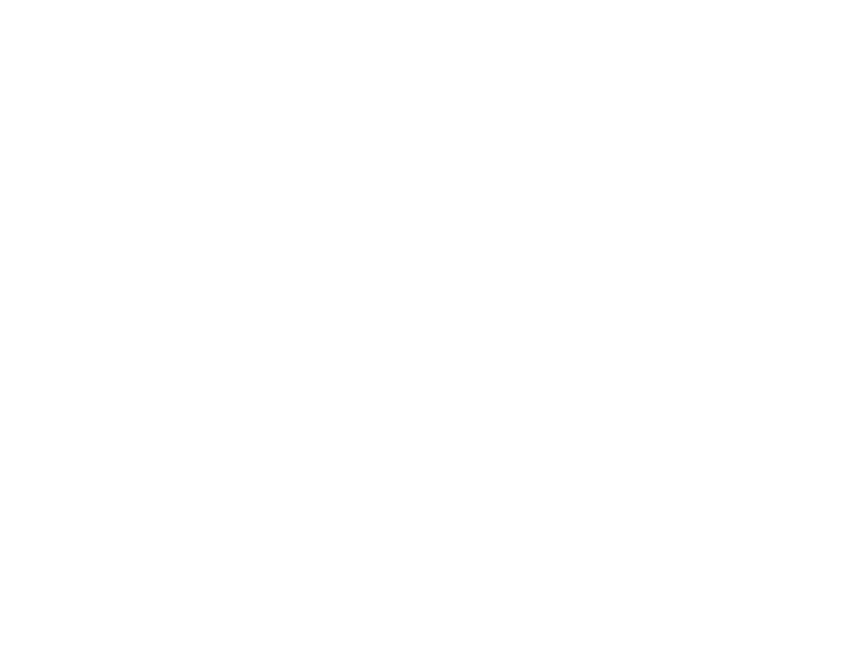

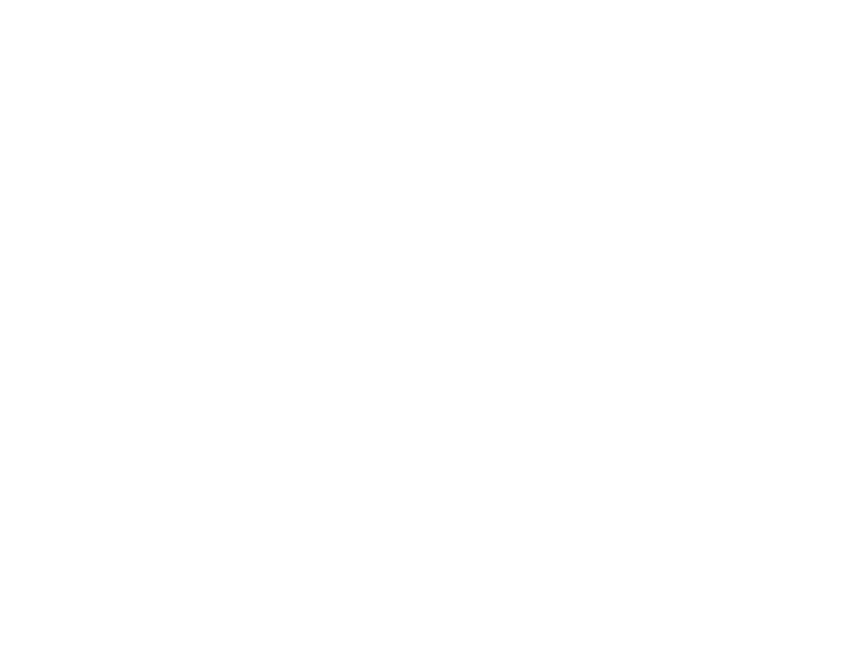

In [2]:
# Set up main figure plotting
%matplotlib ipympl
FigS6 = Fig(num="S6", grid=(8, 9), size=(8.5, 6.5), fontsize=6)
FigS6stats = Fig(num="S6 stats", grid=(8, 9), size=(8.5, 6.5), fontsize=6)
FigS6comb = FigMirror(FigS6, FigS6stats)
print(FigS6.fig.get_size_inches())

Top row - all example neurons, maybe 8?

Loading previous 2d placefield analysis for Marble12 Open day -2 to Open day -1
Correlations calculated at best rotation angle = 90
Loading previous 2d placefield analysis for Marble12 Open day -2 to Open day -1
Loading previous 2d placefield analysis for Marble12 Open day -2 to Open day -1
Loading previous 2d placefield analysis for Marble12 Open day -2 to Open day -1
Loading previous 2d placefield analysis for Marble12 Open day -2 to Open day -1
Loading previous 2d placefield analysis for Marble12 Open day -2 to Open day -1
Loading previous 2d placefield analysis for Marble12 Open day -2 to Open day -1
Loading previous 2d placefield analysis for Marble12 Open day -2 to Open day -1
Loading previous 2d placefield analysis for Marble12 Open day -2 to Open day -1


Text(0, 0.5, 'Sess. Rot. 90 deg.')

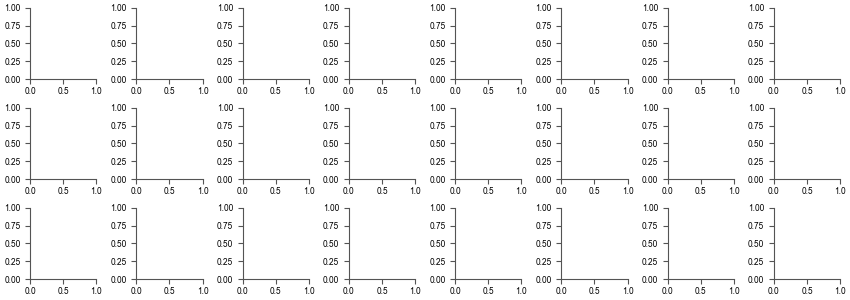

In [3]:
# Set up example session with coherent rotation - Marble 12 Open field Day -2 to -1
mouse, arena, day1, day2 = 'Marble12', 'Open', -2, -1
PFrot = pfs.PFCombineObject(mouse, arena, day1, arena, day2)

# Set up axes for tmaps
axpf1, axpf2, axpf2rot = [], [], []
for i in range(8):
    axpf1.append(FigS6comb.subplot(subplot_spec=FigS6.gs[0, i])[0])
    axpf2.append(FigS6comb.subplot(subplot_spec=FigS6.gs[1, i])[0])
    axpf2rot.append(FigS6comb.subplot(subplot_spec=FigS6.gs[2, i])[0])
axpf1 = np.array(axpf1)
axpf2 = np.array(axpf2)
axpf2rot = np.array(axpf2rot)

# Set up axes for raw data
axtr1, axtr2, axtr2rot = [], [], []
for i in range(8):
    axtr1.append(FigS6comb.subplot(subplot_spec=FigS6.gs[3, i])[0])
    axtr2.append(FigS6comb.subplot(subplot_spec=FigS6.gs[4, i])[0])
    axtr2rot.append(FigS6comb.subplot(subplot_spec=FigS6.gs[5, i])[0])
axtr1 = np.array(axtr1)
axtr2 = np.array(axtr2)
axtr2rot = np.array(axtr2rot)

_, araw = plt.subplots(3, 8, figsize=(8.5, 3))  # Note that raw plots are not rotated
# Now plot
cells_plot = [24, 26, 28, 32, 36, 37, 43, 45]
linewidth, markersize = 0.5, 2
for a1, a2, a2rot, ar1, ar2, ar2rot, idc in zip(axpf1, axpf2, axpf2rot, axtr1, axtr2, axtr2rot, cells_plot):
    ause = np.array([[ar1, ar2], [a1, a2]])
    auserot = np.array([[ar1, ar2rot], [a1, a2rot]])
    PFrot.pfplot(idc, ax=ause, linewidth=linewidth, markersize=markersize)
    PFrot.pfplot(idc, ax=auserot, best_rot=True, linewidth=linewidth, markersize=markersize)

axpf1[0].set_ylabel('Sess. 1')
axpf2[0].set_ylabel('Sess. 2 No Rot.')
axpf2rot[0].set_ylabel('Sess. Rot. 90 deg.')

Quantify rotation - histogram of center-out angle changes

In [4]:
axang, axang_stats = FigS6comb.subplot(FigS6.gs[6:8, 0:3])
mouse, arena, day1, day2 = 'Marble12', 'Open', -2, -1
PFm2 = pfs.PFCombineObject(mouse, arena, day1, arena, day2)
dang2 = PFm2.get_pf_ang_delta()
axang.hist(dang2, range=(-180, 180), bins=30)
axang.set_xlabel('PF Rotation Angle')
axang.set_ylabel('Count')
axang.set_title('Center Out PF Rotations')


Loading previous 2d placefield analysis for Marble12 Open day -2 to Open day -1
Correlations calculated at best rotation angle = 90


Text(0.5, 1.0, 'Center Out PF Rotations')

Now plot correlation at both no rotation and best rotation

In [5]:
axcorrs_norot, axcorrs_norot_stats = FigS6comb.subplot(FigS6.gs[6:8, 3:6])
axcorrs_bestrot, axcorrs_bestrot_stats = FigS6comb.subplot(FigS6.gs[6:8, 6:9])
pf_file = 'placefields_cm1_manlims_1000shuf.pkl'
corrs_norot = pfs.pf_corr_bw_sesh(mouse, arena, day1, arena, day2, pf_file=pf_file, shuf_map=False)
_, best_rot, _ = pfs.get_best_rot(mouse, arena, day1, arena, day2, pf_file=pf_file)
corrs_bestrot = pfs.pf_corr_bw_sesh(mouse, arena, day1, arena, day2, pf_file=pf_file, shuf_map=False,
                                rot_deg=best_rot[1])

axcorrs_norot.hist(corrs_norot[1], range=(-1, 1), bins=30)  # 1 index is to use smoothed PF maps (0 = unsmoothed)
axcorrs_bestrot.hist(corrs_bestrot[1], range=(-1, 1), bins=30)

for a in [axcorrs_norot, axcorrs_bestrot]:
    a.set_xlabel('PF Correlation')
    a.set_ylabel('Count')

axcorrs_norot.set_title('No Rotation')
axcorrs_bestrot.set_title('At Best Rotation')
axcorrs_norot.set_ylim(axcorrs_bestrot.get_ylim())

Loading previous 2d placefield analysis for Marble12 Open day -2 to Open day -1


(0.0, 23.1)

Save pdfs

In [6]:
plot_path = Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots')
FigS6.savefig(plot_path / "FigS6_rot_example.pdf")